In [1]:
"""Converts MNIST data to TFRecords file format with Example protos."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import sys
## generating the training batches
import numpy as np
import scipy.io
from array import array
import meta
%pylab inline
from matplotlib.patches import Rectangle
import numpy as np
from PIL import *
from matplotlib import pyplot as plt

import tensorflow as tf

from tensorflow.contrib.learn.python.learn.datasets import mnist

Populating the interactive namespace from numpy and matplotlib


/home/olle/anaconda3/envs/tensorflow/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
data_sets = mnist.read_data_sets('./test',
                                   dtype=tf.uint8,
                                   reshape=False,
                                   validation_size=5000)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./test/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./test/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./test/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./test/t10k-labels-idx1-ubyte.gz


# Below is the wished format for the script convertion_to_TFRecord

In [4]:
print(data_sets.train.images.shape)
print(data_sets.train.labels.shape)

print(type(data_sets.train.images))
print(type(data_sets.train.labels))

(55000, 28, 28, 1)
(55000,)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [2]:
input_file = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/train/train.zip.005'
read_input = scipy.io.loadmat(input_file)

ValueError: Unknown mat file type, version 225, 212

In [3]:
train_images = read_input['X']
train_labels = read_input['y']

In [4]:
train_images = train_images.reshape(73257,32,32,3)
train_labels = train_labels.reshape(train_labels.shape[0])

In [14]:
print(train_images.shape)
print(train_labels.shape)

print(type(train_images))
print(type(train_labels))

(73257, 32, 32, 3)
(73257,)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


# Below is the the data_set class created formatting the data into the wished numpy format

In [14]:
class data_set(object):
    pass

read_input = scipy.io.loadmat('/home/olle/PycharmProjects/digits/data/train/train_32x32.mat')

train_images = read_input['X']
train_labels = read_input['y']

train_images = train_images.transpose()
train_labels = train_labels.reshape(train_labels.shape[0])

data_set = data_set()

data_set.images = train_images
data_set.labels = train_labels
data_set.num_examples = train_images.shape[0]

In [15]:
print(data_set.images.shape)
print(data_set.labels.shape)

print(type(data_set.images))
print(type(data_set.labels))

print(data_set.num_examples)

(73257, 3, 32, 32)
(73257,)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
73257


In [8]:
train_labels.shape[0]

73257

# Visualize the images, making sure the transformation have not changed there pixel composition

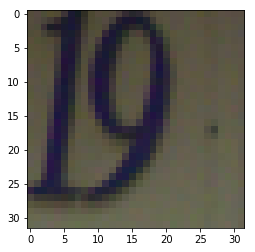

In [33]:
image_val = data_set.images[:,:,:,1]

img = Image.fromarray(image_val, 'RGB')

plt.imshow(img, interpolation='nearest')
plt.show()

In [32]:
data_set.images[:,:,:,1].shape

(32, 32, 3)